# Bike Sharing Assignment:

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

### Importing Necessary Libraries:


In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [332]:
data=pd.read_csv("day.csv",index_col='instant',parse_dates=['dteday'])

In [333]:
data.shape

(730, 15)

In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 91.2 KB


In [335]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [336]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [337]:
# checking for Null values in each column
data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [338]:
# row-wise null count percentage
round(data.isnull().sum(axis=1),2).sort_values(ascending=False)

instant
730    0
251    0
249    0
248    0
247    0
      ..
485    0
484    0
483    0
482    0
1      0
Length: 730, dtype: int64

Inferences:
- There are NO MISSING/NULL values either in columns or rows.

#### Duplicate Check

In [339]:
# Checking for duplicates and dropping the entire duplicate row if any
data.drop_duplicates(subset=None,inplace=True)

In [340]:
data.shape

(730, 15)

Inferences:
- There are NO DUPLICATE ROWS in a dataset.

In [341]:
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
data.drop(['casual','registered'],axis=1,inplace=True)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

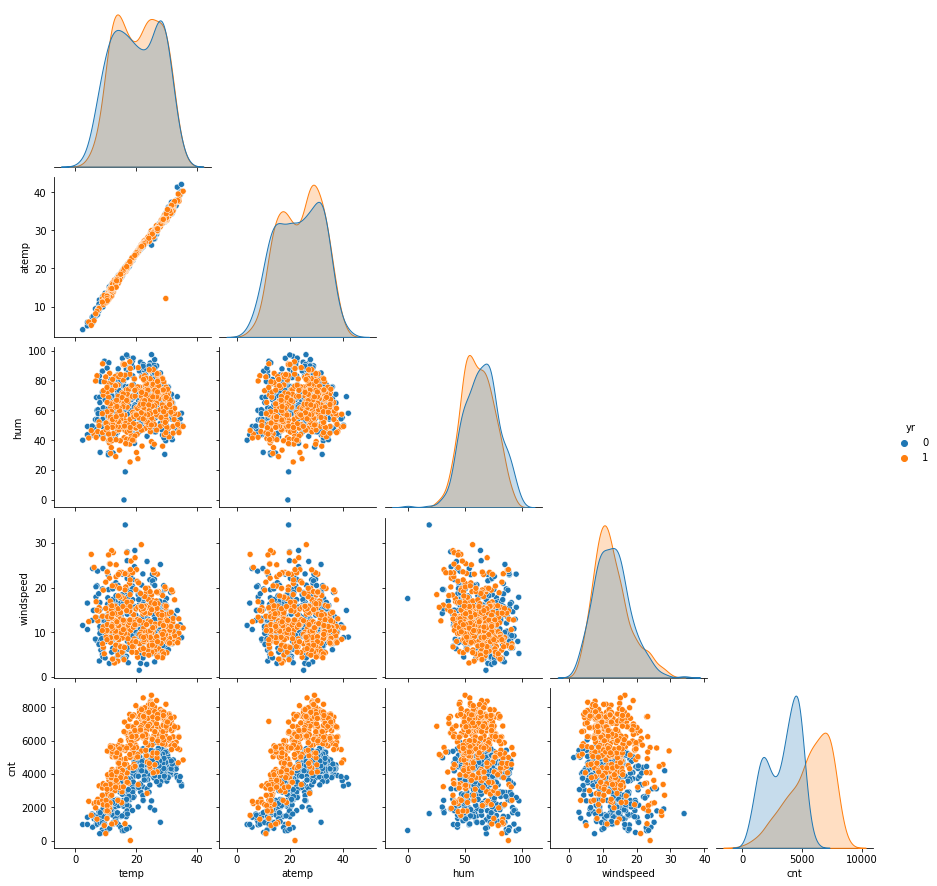

In [342]:
num_cols=['temp','atemp','hum','windspeed','cnt']
plot_cols=['temp','atemp','hum','windspeed','cnt','yr']
sns.pairplot(data[plot_cols],hue='yr',corner=True,diag_kind='kde')

plt.show()

In [344]:
round(data[num_cols].corr()['cnt'],3).sort_values(ascending=False)

cnt          1.000
atemp        0.631
temp         0.627
hum         -0.099
windspeed   -0.235
Name: cnt, dtype: float64

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

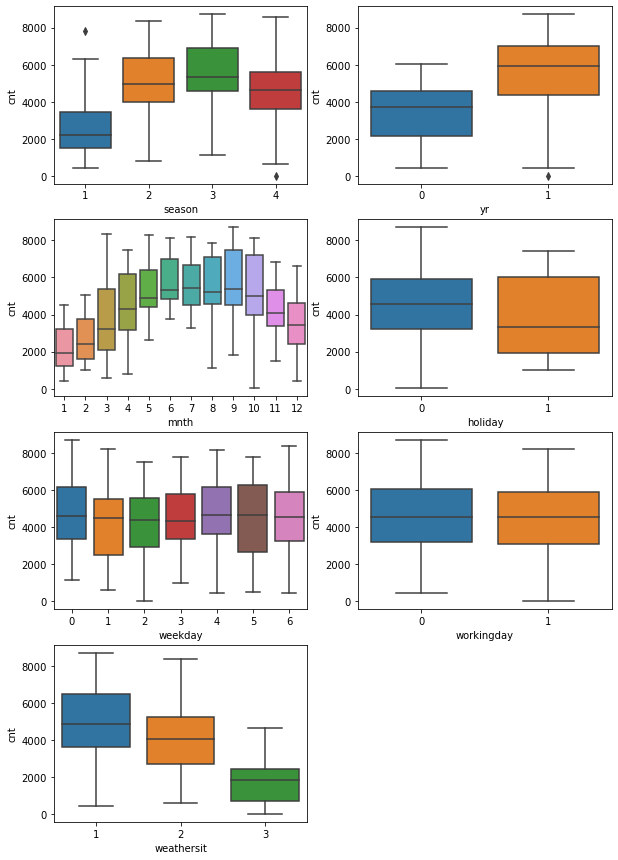

In [252]:
plt.figure(figsize=(10, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)

plt.show()


## Step 3: Data Preparation

In [254]:
#from data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
#We will replace season,weekday and weathersit with appropriate values

In [255]:
data['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
data.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,2018-01-01,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,2018-02-01,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,2018-03-01,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,2018-04-01,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,2018-05-01,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
6,2018-06-01,spring,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
7,2018-07-01,spring,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
8,2018-08-01,spring,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
9,2018-09-01,spring,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822


In [256]:
data['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
data.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,2018-01-01,spring,0,1,0,1,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
2,2018-02-01,spring,0,1,0,2,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
3,2018-03-01,spring,0,1,0,3,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
4,2018-04-01,spring,0,1,0,4,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
5,2018-05-01,spring,0,1,0,5,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
6,2018-06-01,spring,0,1,0,6,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
7,2018-07-01,spring,0,1,0,0,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
8,2018-08-01,spring,0,1,0,1,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
9,2018-09-01,spring,0,1,0,2,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822


In [257]:
data['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
data.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,2018-01-01,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
2,2018-02-01,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
3,2018-03-01,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
4,2018-04-01,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
5,2018-05-01,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
6,2018-06-01,spring,0,1,0,Saturday,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
7,2018-07-01,spring,0,1,0,Sunday,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
8,2018-08-01,spring,0,1,0,Monday,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
9,2018-09-01,spring,0,1,0,Tuesday,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822


In [258]:
data['mnth'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"},inplace=True)
data.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,2018-01-01,spring,0,January,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
2,2018-02-01,spring,0,January,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
3,2018-03-01,spring,0,January,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
4,2018-04-01,spring,0,January,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
5,2018-05-01,spring,0,January,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
6,2018-06-01,spring,0,January,0,Saturday,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
7,2018-07-01,spring,0,January,0,Sunday,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
8,2018-08-01,spring,0,January,0,Monday,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
9,2018-09-01,spring,0,January,0,Tuesday,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822


In [259]:
data.drop(['dteday'],axis=1,inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,spring,0,January,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
2,spring,0,January,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
3,spring,0,January,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
4,spring,0,January,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
5,spring,0,January,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 94.1+ KB


In [261]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

Season_condition=pd.get_dummies(data['season'],drop_first=True)
Weather_condition=pd.get_dummies(data['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(data['weekday'],drop_first=True)
Month=pd.get_dummies(data['mnth'],drop_first=True)

In [262]:
data=pd.concat([data,Season_condition],axis=1)
data=pd.concat([data,Weather_condition],axis=1)
data=pd.concat([data,Day_of_week],axis=1)
data=pd.concat([data,Month],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   temp                                730 non-null    float64
 8   atemp                               730 non-null    float64
 9   hum                                 730 non-null    float64
 10  windspeed                           730 non-null    float64
 11  cnt                                 730 non-n

In [263]:
#Deleting the orginal columns season.weathersit,weekday,mnth
data.drop(['season'],axis=1,inplace=True)
data.drop(['weathersit'],axis=1,inplace=True)

data.drop(['weekday'],axis=1,inplace=True)

data.drop(['mnth'],axis=1,inplace=True)

data.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [264]:
#Now the data is ready to split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 5: Scaling the train data

In [265]:
from sklearn.preprocessing import MinMaxScaler

In [266]:
scaler = MinMaxScaler()

In [267]:
num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [268]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
instant,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
729,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


In [269]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


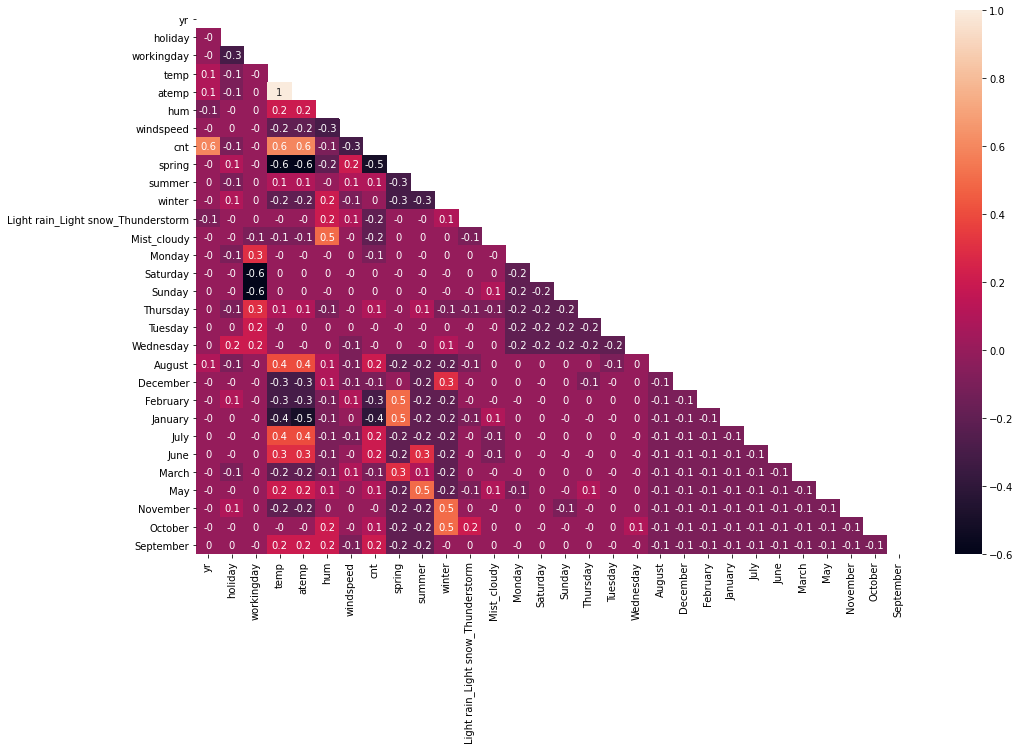

In [270]:
df_train.corr()
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
sns.heatmap(round(df_train.corr(), 1), annot=True,mask=mask)
plt.show()

In [271]:
round(df_train.corr()['cnt'],2).sort_values(ascending=False)

cnt                                   1.00
atemp                                 0.65
temp                                  0.64
yr                                    0.59
August                                0.23
September                             0.20
June                                  0.19
July                                  0.16
summer                                0.13
May                                   0.11
Thursday                              0.11
October                               0.07
Sunday                                0.03
winter                                0.03
Saturday                              0.01
workingday                           -0.01
Tuesday                              -0.02
Wednesday                            -0.02
November                             -0.05
hum                                  -0.06
Monday                               -0.07
holiday                              -0.10
December                             -0.14
March      

Inference:
   - Clearly there is a perfect correlation between the columns `temp` and `atemp`.so, we need to remove one among these.

In [272]:
#CREATING X AND Y
y_train = df_train.pop('cnt') #permenantly removes cnt column from df_train
X_train = df_train

In [273]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
instant,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,1,0
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
729,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,1,0,0,0,0,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
y_train.head()

instant
654    0.864243
577    0.827658
427    0.465255
729    0.204096
483    0.482973
Name: cnt, dtype: float64

## Step 6: Building a linear model

In [275]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### RFE Approach for Feature Selection

In [276]:
# Initially we start with 10 Vars and will use Mixed approach to build a model

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [277]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('August', False, 10),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 7),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1)]

In [278]:
col = X_train.columns[rfe.support_] #which giives TRUE condition satisfied columns from x_train
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light rain_Light snow_Thunderstorm', 'Mist_cloudy',
       'December', 'January', 'July', 'November', 'September'],
      dtype='object')

In [279]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'August', 'February', 'June', 'March', 'May',
       'October'],
      dtype='object')

In [280]:
X_train_rfe = X_train[col] #new dataframe after dropping features by keeping only top 10 variables

In [281]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,December,January,July,November,September
instant,,,,,,,,,,,,,,,
654,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
577,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0
427,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0
729,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0
483,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0


#### Model 1

In [282]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [283]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [284]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          3.34e-189
Time:                        19:00:14   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [285]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [286]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
9,Mist_cloudy,2.32
0,yr,2.09
13,November,1.83
11,January,1.75


In [287]:
#COLUMN hum HAS A VERY HIGH VIF SO WE NEED TO DROP IT
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [288]:
X_train_rfe.head()

,yr,holiday,temp,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,December,January,July,November,September
instant,,,,,,,,,,,,,,
654,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0
577,1,0,0.815169,0.264686,0,0,0,0,0,0,0,1,0,0
427,1,0,0.442393,0.255342,1,0,0,0,1,0,0,0,0,0
729,1,0,0.245101,0.663106,1,0,0,0,0,1,0,0,0,0
483,1,0,0.395666,0.188475,0,1,0,0,1,0,0,0,0,0


### Model 2

In [289]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [290]:
lm = sm.OLS(y_train,X_train_rfe2).fit()

In [291]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.57e-186
Time:                        19:00:16   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [292]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
12,November,1.80
10,January,1.66
11,July,1.59
8,Mist_cloudy,1.56


In [293]:
#COLUMN temp HAS A VERY HIGH VIF SO WE NEED TO DROP IT
X_train_rfe=X_train_rfe.drop(['temp'],axis=1)

### Model 3

In [294]:
X_train_rfe3 = sm.add_constant(X_train_rfe)

In [295]:
lm = sm.OLS(y_train,X_train_rfe3).fit()

In [296]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Sun, 09 May 2021   Prob (F-statistic):          5.50e-160
Time:                        19:00:16   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [297]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
2,windspeed,3.88
3,spring,2.89
5,winter,2.84
4,summer,2.01
0,yr,1.83
11,November,1.79
9,January,1.64
7,Mist_cloudy,1.52
8,December,1.45
10,July,1.20


In [298]:
#COLUMN windspeed HAS A VIF>2 SO WE ARE REMOVING IT
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

### Model 4

In [299]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 09 May 2021   Prob (F-statistic):          7.28e-152
Time:                        19:00:17   Log-Likelihood:                 417.76
No. Observations:                 510   AIC:                            -809.5
Df Residuals:                     497   BIC:                            -754.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [300]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
4,winter,2.52
2,spring,1.98
10,November,1.78
0,yr,1.75
8,January,1.62
6,Mist_cloudy,1.50
7,December,1.45
3,summer,1.36
11,September,1.13
9,July,1.08


In [301]:
#COLUMN winter HAS A VIF>2 SO WE ARE REMOVING IT
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

### Model 5

In [302]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     154.3
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.40e-152
Time:                        19:00:18   Log-Likelihood:                 416.84
No. Observations:                 510   AIC:                            -809.7
Df Residuals:                     498   BIC:                            -758.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [303]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
2,spring,1.85
0,yr,1.64
7,January,1.61
5,Mist_cloudy,1.43
3,summer,1.32
9,November,1.13
10,September,1.13
6,December,1.10
8,July,1.07
1,holiday,1.06


In [304]:
#COLUMN July HAS A P valve>0.05 SO WE ARE REMOVING IT
X_train_rfe=X_train_rfe.drop(['July'],axis=1)

### Model 6

In [305]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     170.1
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.11e-153
Time:                        19:00:18   Log-Likelihood:                 416.78
No. Observations:                 510   AIC:                            -811.6
Df Residuals:                     499   BIC:                            -765.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [306]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
2,spring,1.84
7,January,1.61
0,yr,1.54
5,Mist_cloudy,1.43
3,summer,1.30
8,November,1.12
9,September,1.12
6,December,1.10
1,holiday,1.06
4,Light rain_Light snow_Thunderstorm,1.03


Model 6 has no issues with both VIF and P-values. However, it has an Adjusted-R-square of just 0.769.We will now try to create 
New varibles which can explain the dependent variable `cnt` and thus increase the Adjusted-R-square  value.

### Model 7

In [307]:
#ADDING SATURDAY AND CHECKING IF MODEL IMPROVES

X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

,yr,holiday,spring,summer,Light rain_Light snow_Thunderstorm,Mist_cloudy,December,January,November,September,Saturday
instant,,,,,,,,,,,
654,1,0,0,0,0,0,0,0,0,0,0
577,1,0,0,0,0,0,0,0,0,0,0
427,1,0,1,0,0,1,0,0,0,0,0
729,1,0,1,0,0,0,1,0,0,0,0
483,1,0,0,1,0,1,0,0,0,0,0


In [308]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe7).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     155.3
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.41e-153
Time:                        19:00:19   Log-Likelihood:                 418.03
No. Observations:                 510   AIC:                            -812.1
Df Residuals:                     498   BIC:                            -761.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [309]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
2,spring,1.85
7,January,1.61
0,yr,1.55
5,Mist_cloudy,1.44
3,summer,1.31
8,November,1.13
9,September,1.13
10,Saturday,1.12
6,December,1.10
1,holiday,1.06


In [310]:
#Saturday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)


### Model 8

In [311]:
#ADDING SUNDAY TO CHECK IF MODEL IMPROVES
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,yr,holiday,spring,summer,Light rain_Light snow_Thunderstorm,Mist_cloudy,December,January,November,September,Sunday
instant,,,,,,,,,,,
654,1,0,0,0,0,0,0,0,0,0,0
577,1,0,0,0,0,0,0,0,0,0,0
427,1,0,1,0,0,1,0,0,0,0,1
729,1,0,1,0,0,0,1,0,0,0,0
483,1,0,0,1,0,1,0,0,0,0,1


In [312]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe8).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     154.9
Date:                Sun, 09 May 2021   Prob (F-statistic):          7.33e-153
Time:                        19:00:20   Log-Likelihood:                 417.50
No. Observations:                 510   AIC:                            -811.0
Df Residuals:                     498   BIC:                            -760.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [313]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
2,spring,1.85
7,January,1.61
0,yr,1.56
5,Mist_cloudy,1.45
3,summer,1.31
10,Sunday,1.14
9,September,1.13
8,November,1.12
6,December,1.11
1,holiday,1.06


In [314]:
# Sunday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Sunday'],axis=1)


After checking if there any other siginifcant variables which can improve the model, we found that Model 6 is the best, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. We will use this model to predict count values from the test dataset after performing more detailed analysis on the residuals from the train data.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [315]:
#Predict values
y_train_cnt = lm6.predict(X_train_rfe6)

In [316]:
#CALCULATING RESIDUALS

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

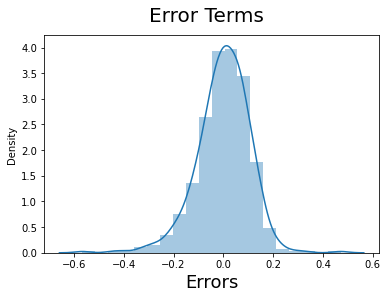

In [317]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Q-Q plot for errors

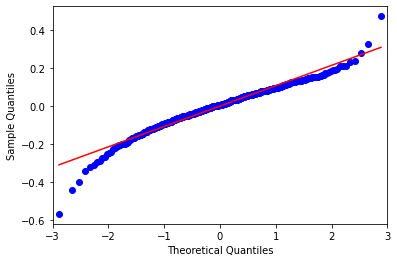

In [318]:
import statsmodels.api as sm
sm.qqplot(res,line='s')
plt.show()

From the above q-q plot, it is evident that except for a slight fat tail, the errors follow the normal distribution and doesnt violate the normality assumption of linear regression 

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model.

#### Applying the scaling on the test sets

We will use the scaler which was fit on the train data to transform the test data. This is so because if we fit a scaler again on the test data we will deviate from the original and have different coefficients compared to our model 6, also we dont know the proper min and max values from the test dataset. Also, the sense check we did to see if all the values are between 0 and 1 in the train dataset, doesnt apply for the test dataset as we might have a few values which can be less/more than min and max of the train dataset resulting in observation values of less than 0 as well as greater than 1. We do this because we do not want to learn from the test data again as we already learned the train data so will apply train data min and max values and then transform the values on the test data.

In [319]:
num_vars=['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [320]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,0
536,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,1,0,0,0,0,0
300,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,0,1,0
222,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,0,0,0


In [321]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [322]:
y_test = df_test.pop('cnt')
X_test = df_test

In [323]:
X_train_new=X_train_rfe6.drop(['const'], axis=1)

In [324]:
print(X_train_new.columns)
X_train_new.head()

Index(['yr', 'holiday', 'spring', 'summer',
       'Light rain_Light snow_Thunderstorm', 'Mist_cloudy', 'December',
       'January', 'November', 'September'],
      dtype='object')


,yr,holiday,spring,summer,Light rain_Light snow_Thunderstorm,Mist_cloudy,December,January,November,September
instant,,,,,,,,,,
654,1,0,0,0,0,0,0,0,0,0
577,1,0,0,0,0,0,0,0,0,0
427,1,0,1,0,0,1,0,0,0,0
729,1,0,1,0,0,0,1,0,0,0
483,1,0,0,1,0,1,0,0,0,0


In [325]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test and taking only the relevent columns from x_train model 6

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [326]:
X_test_new.head()

,const,yr,holiday,spring,summer,Light rain_Light snow_Thunderstorm,Mist_cloudy,December,January,November,September
instant,,,,,,,,,,,
185,1.0,0,1,0,0,0,1,0,0,0,0
536,1.0,1,0,0,1,0,0,0,0,0,0
300,1.0,0,0,0,0,0,1,0,0,0,0
222,1.0,0,0,0,0,0,0,0,0,0,0
153,1.0,0,0,0,1,0,0,0,0,0,0


In [327]:
#Making predictions on the chosen model

y_pred = lm6.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

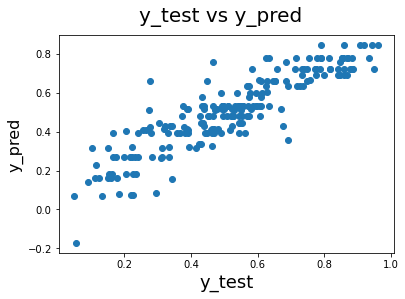

In [328]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [329]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [330]:
#Returns the mean squared error; we'll take a square root
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print('Root Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Root Mean_Squared_Error : 0.0999063860567021
r_square_value : 0.7898491179826097


We can see that the equation of our best fitted line is:

$ cnt =  0.5320  \times  const +  0.2448  \times  yr -0.0880 \times holiday -0.2621 \times spring -0.0539 \times summer -0.3354 \times Light rain Light snow Thunderstorm -0.0873 \times Mist_cloudy -0.1112 \times December -0.1061  \times January-0.1194 \times November + 0.0658 \times September $
